In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOADING THE DATA SET

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

The MNIST data set has a total of 70k data images  out of which 60k are testing data and the rest are training data, for 
visualising and observing i have used the testing data part.

# EXPLORING THE DATA SET

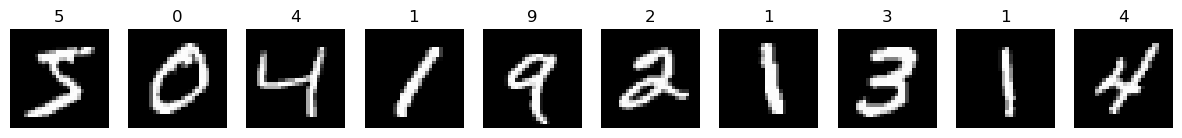

In [28]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(y_train[i]))

plt.show()

I have printed the first 10 images above with labels.

# FLATTEN THE IMAGES

In [29]:
x_train_flattened = x_train.flatten()
x_train_normalise = x_train_flattened / 255

# DISTRIBUTION

In [30]:
label_counts = np.bincount(y_train)
for i in range(10):
    print(f"The digit {i} occurs {label_counts[i]} times")


The digit 0 occurs 5923 times
The digit 1 occurs 6742 times
The digit 2 occurs 5958 times
The digit 3 occurs 6131 times
The digit 4 occurs 5842 times
The digit 5 occurs 5421 times
The digit 6 occurs 5918 times
The digit 7 occurs 6265 times
The digit 8 occurs 5851 times
The digit 9 occurs 5949 times


Using the above function it is easy for us to count the number of times a paritculae label occurs. Please note this is only
for the testing data

# VISUALISING FEW EXAMPLES

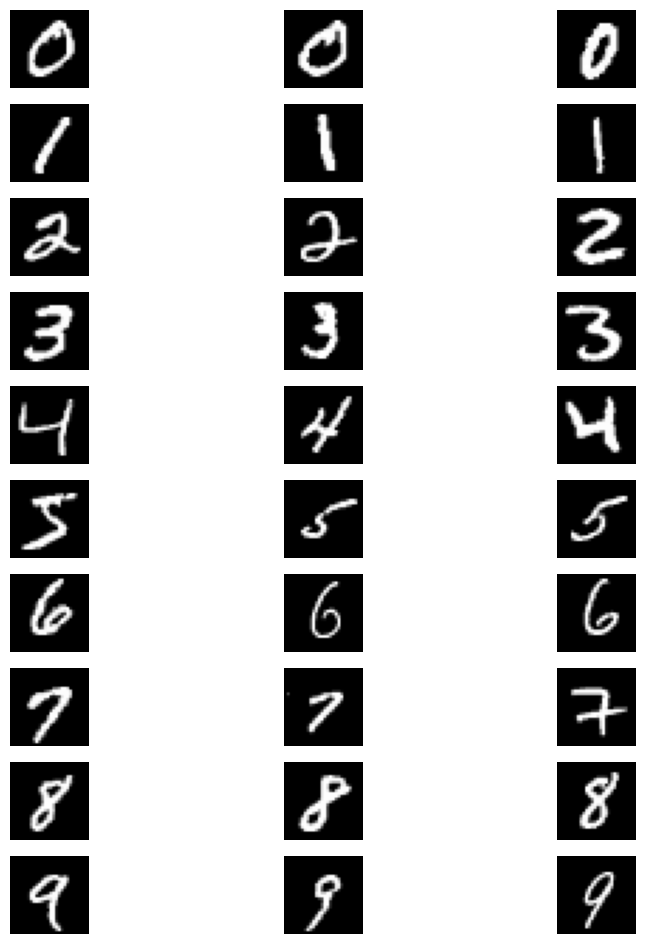

In [31]:
examples_by_digit = {digit: [] for digit in range(10)}


for i in range(len(x_train)):
    digit = y_train[i]
    if len(examples_by_digit[digit]) < 3:  
        examples_by_digit[digit].append(x_train[i])


fig, axes = plt.subplots(10, 3, figsize=(10, 12))

for digit in range(10):
    for i in range(3):
        axes[digit, i].imshow(examples_by_digit[digit][i], cmap='gray')
        axes[digit, i].axis('off')

plt.show()

# RANDOM 10 IMAGES

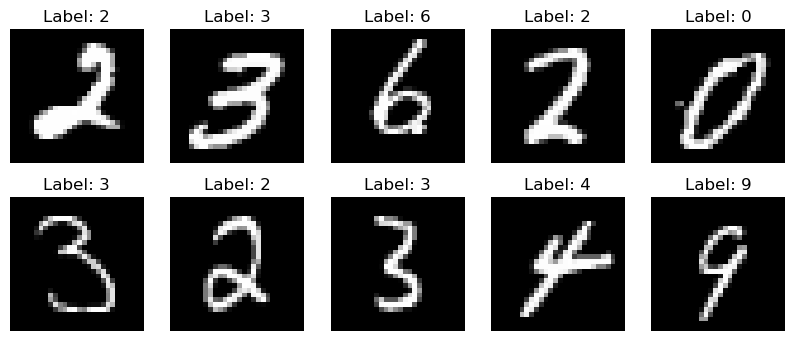

In [32]:
random_indices = np.random.randint(0, len(x_train), size=10)

# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Plot images and labels
for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis('off')

plt.show()

# BAR CHART DISPLAYING DISTRIBUTION OF DIGIT CLASSES

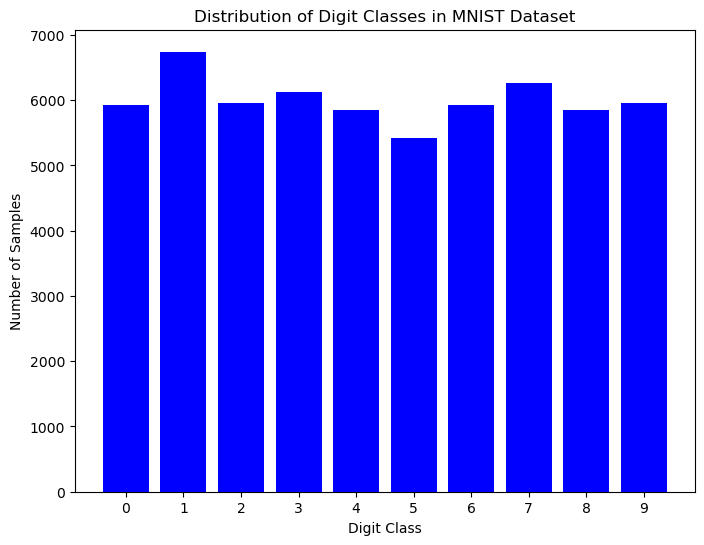

In [33]:
# Calculate the label distribution
label_counts = np.bincount(y_train)

plt.figure(figsize=(8, 6))
plt.bar(range(10), label_counts, color='blue')
plt.title('Distribution of Digit Classes in MNIST Dataset')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.xticks(range(10), labels=[str(i) for i in range(10)])
plt.show()


# ROTATING THE IMAGE

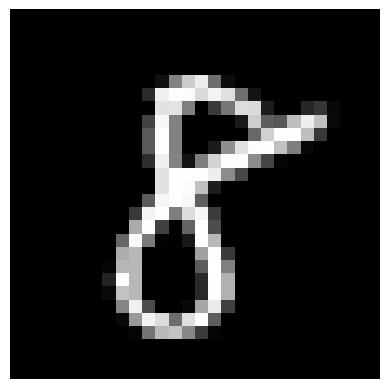

In [34]:
index = np.random.randint(0, len(x_train))
img = x_train[index]

# Reshape the image to (28, 28, 1) and expand dimensions for the model
img_array = np.expand_dims(np.expand_dims(img, axis=-1), axis=0)

# Create a Keras preprocessing layer to rotate the image
rotated_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2)

# Apply the rotation to the image
rotated_img_array = rotated_layer(img_array)

# Convert the rotated image array back to a NumPy array for visualization
rotated_img = rotated_img_array.numpy().squeeze()
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

# DISPLAYING ROTATED IMAGE

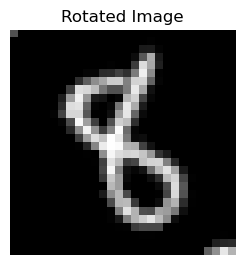

In [38]:
plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_img, cmap='gray')
plt.axis('off')

plt.show()